## Technohacks Intern Task - 3

## Social Media Sentiment Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df_init = pd.read_csv("Tweets.csv")
df_init.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df = df_init[['airline_sentiment', 'text']].copy()
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


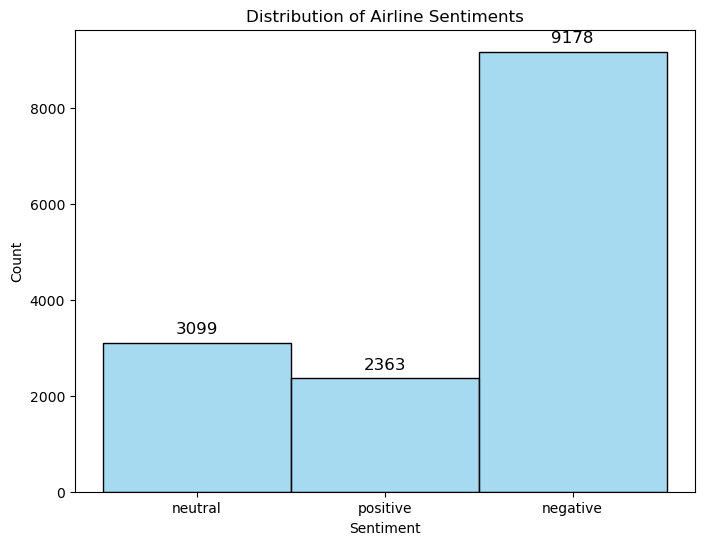

In [4]:
sentiment_counts = df['airline_sentiment'].value_counts()

# Visualize the distribution using a histogram with counts on bars
plt.figure(figsize=(8, 6))
ax = sns.histplot(df['airline_sentiment'], bins=3, color='skyblue', discrete=True)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Airline Sentiments')

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, xytext=(0, 10), textcoords='offset points')

plt.xticks()
plt.show()

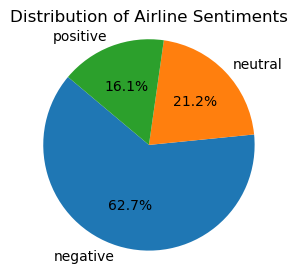

In [5]:
sentiment_counts = df['airline_sentiment'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Airline Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [6]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['airline_sentiment'] = df['airline_sentiment'].str.strip()
df['target'] = df['airline_sentiment'].map(target_map)

In [7]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


### Splitting the dataset

In [8]:
df_train, df_test = train_test_split(df)

In [9]:
df_train.head()

,airline_sentiment,text,target
12995,positive,"@AmericanAir Chicago seen from seat 6A, AA 162...",1
10305,negative,@USAirways @nburnside26 Well if you really did...,0
4588,neutral,@SouthwestAir opened online applications for F...,2
9355,negative,@USAirways even if I was the single most unrea...,0
12610,neutral,@AmericanAir follow me back so I can DM you guys,2


### Vectorization

In [10]:
vectorizer = TfidfVectorizer(max_features=2000)
x_train = vectorizer.fit_transform(df_train['text'])
x_test = vectorizer.transform(df_test['text'])
y_train = df_train['target']
y_test = df_test['target']

### Logistic Regression Model

In [11]:
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

### Evaluate the model

In [12]:
train_accuracy = model.score(x_train, y_train)
test_accuracy = model.score(x_test, y_test)
print('Train accuracy: ', train_accuracy)
print('Test accuracy: ', test_accuracy)

Train accuracy:  0.8579234972677595
Test accuracy:  0.7846994535519126


### Predict probabilities for ROC AUC calculation

In [13]:
Pr_train = model.predict_proba(x_train)
Pr_test = model.predict_proba(x_test)
train_auc = roc_auc_score(y_train, Pr_train, multi_class='ovo')
test_auc = roc_auc_score(y_test, Pr_test, multi_class='ovo')
print('Train AUC: ', train_auc)
print('Test AUC: ', test_auc)

Train AUC:  0.9450315481080128
Test AUC:  0.8840588590663468


### Predict labels for confusion matrix

In [14]:
P_train = model.predict(x_train)
P_test = model.predict(x_test)

### Create a normalized confusion matrix for the training set

In [15]:
cm_train = confusion_matrix(y_train, P_train, normalize='true')
cm_train

array([[0.96427022, 0.00795602, 0.02777376],
       [0.18856172, 0.71687429, 0.09456399],
       [0.30595393, 0.04737071, 0.64667536]])

### Create a heatmap for the confusion matrix (training set)

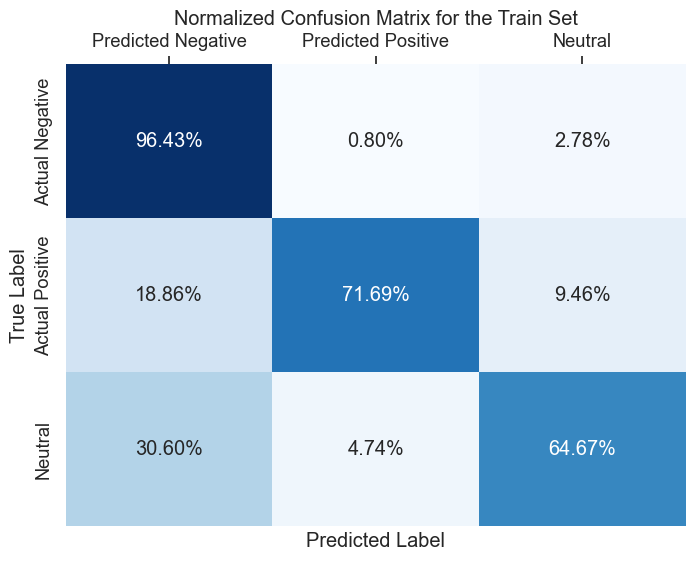

In [16]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_train, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive', 'Neutral'],
            yticklabels=['Actual Negative', 'Actual Positive', 'Neutral'])
heatmap.xaxis.set_ticks_position('top')  # Move x-axis labels to the top
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for the Train Set')
plt.show()

### Create a normalized confusion matrix for the testing set

In [17]:
cm_test = confusion_matrix(y_test, P_test, normalize='true')
cm_test

array([[0.93421634, 0.01633554, 0.04944812],
       [0.25963149, 0.59798995, 0.14237856],
       [0.42857143, 0.07142857, 0.5       ]])

### Create a heatmap for the confusion matrix (testing set)

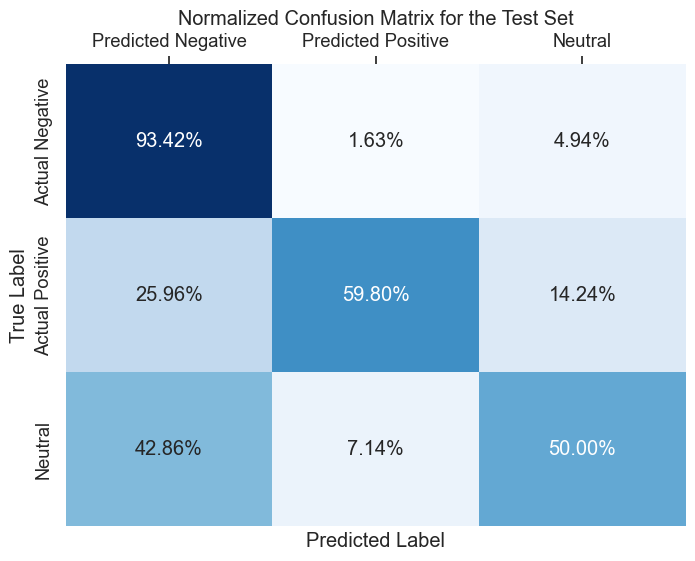

In [18]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cm_test, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive', 'Neutral'],
            yticklabels=['Actual Negative', 'Actual Positive', 'Neutral'])
heatmap.xaxis.set_ticks_position('top')  # Move x-axis labels to the top
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalized Confusion Matrix for the Test Set')
plt.show()

In [19]:
# Filter the dataset to focus on binary sentiment classification (positive vs. negative)
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [20]:
# Vectorize text data for the binary sentiment classification
x_train = vectorizer.fit_transform(df_b_train['text'])
x_test = vectorizer.transform(df_b_test['text'])
y_train = df_b_train['target']
y_test = df_b_test['target']

In [21]:
# Train a logistic regression model for binary classification
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)
binary_train_accuracy = model.score(x_train, y_train)
binary_test_accuracy = model.score(x_test, y_test)
print('Binary Train accuracy: ', binary_train_accuracy)
print('Binary Test accuracy: ', binary_test_accuracy)

Binary Train accuracy:  0.9305219495333564
Binary Test accuracy:  0.9056603773584906


In [22]:
# Predict probabilities for ROC AUC calculation (binary classification)
Pr_train = model.predict_proba(x_train)[:, 1]
Pr_test = model.predict_proba(x_test)[:, 1]
binary_train_auc = roc_auc_score(y_train, Pr_train)
binary_test_auc = roc_auc_score(y_test, Pr_test)
print('Binary Train AUC: ', binary_train_auc)
print('Binary Test AUC: ', binary_test_auc)

Binary Train AUC:  0.9788050530628281
Binary Test AUC:  0.9536446027044716


### Plotting a histogram of feature weights 

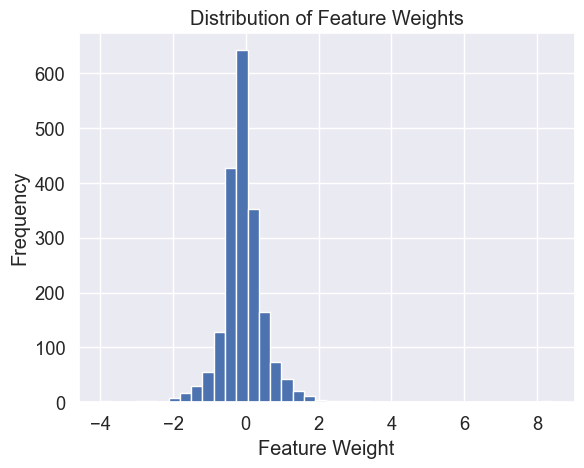

In [23]:
plt.hist(model.coef_[0], bins=40)
plt.xlabel('Feature Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Feature Weights')
plt.show()

In [24]:
# Get the vocabulary index map
word_index_map = vectorizer.vocabulary_
threshold = 2

### Identify and print the most positive words

In [25]:
print('Most Positive Words')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        print(word, weight)

Most Positive Words
great 5.7068351622342135
virginamerica 3.418751965095318
jetblue 3.341177388492414
thank 8.361468008171085
southwestair 2.7623393532725937
thanks 8.414376909959024
good 2.8674605627306007
awesome 4.106009406288693
thx 2.7260278021762234
love 4.445217157205661
best 3.623302677700958
kudos 3.0486398994398174
nice 2.1123740456014968
amazing 3.942164208055511
appreciate 2.423155753594717
excellent 2.3998250245767085
worries 3.140576269124218
wonderful 2.0796285873054563


### Identify and print the most negative words

In [26]:
print('Most Negative Words')
for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight < -threshold:
        print(word, weight)

Most Negative Words
no -3.9788895076207886
hold -2.62346276542098
not -3.98128574074515
hours -3.0810315967214996
why -2.459181744329653
delayed -2.5949973978304794
what -2.028470400187531
cancelled -2.8020891006843582
worst -3.0320262715013295
nothing -2.1666137574729984
